# Project
# Adeliia Salieva

# Intro to dataset

**Link to dataset**

Link to data set: https://www.kaggle.com/datasets/mvieira101/global-cost-of-living

**Observation**

This dataset contains information about the cost of living in almost 5000 cities across the world. The data were gathered by scraping Numbeo's website. It has 59 variables (11 will be used in this analysis) and 4873 observations.

**Variables**

city - Name of the city (categorical)\
country - Name of the country\
x3 - McMeal at McDonalds (or Equivalent Combo Meal) (USD)\
x23 - Water (1.5 liter bottle, at the market) (USD)\
x33 - Gasoline (1 liter) (USD)\
x35 - Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)\
x36 - Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD) \
x38 - Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)\
x42 - Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)\
x44 - 1 Pair of Jeans (Levis 501 Or Similar) (USD)\
x48 - Apartment (1 bedroom) in City Centre (USD)\
x54 - Average Monthly Net Salary (After Tax) (USD)

**Motivation**

It is intersting to analyze the cost of living in various places of the world.

# Import libs, Load dataset, Clean and Filter, Create new columns

In [1]:
# import libraries
import pandas as pd #for reding the dataset
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for showing the plot

In [2]:
# stops columns from being cut off when displayed
pd.set_option('display.max_colwidth', None)

In [23]:
# load data
df = pd.read_csv("cost-of-living.csv")
df = df[df["data_quality"] == 1]
df = df[df['country'] != 'United States']
df = df[["city", "country", "x3", "x23", "x33", "x35", "x36", "x38", "x42", "x44", "x48", "x54"]]
df = df.rename(columns={'city' : 'City', 'country' : 'Country', 'x3': 'McMeal', 'x23': 'Water', 'x33' : 'Gasoline', 'x35' : 'Toyota', 'x36' : 'Basic', 'x38' : 'Internet', 'x42' : 'Preschool', 'x44' : 'Jeans', 'x48' : 'Apt (1 bd) Centre', 'x54' : 'Average Monthly Net Salary'})
df.head()

,City,Country,McMeal,Water,Gasoline,Toyota,Basic,Internet,Preschool,Jeans,Apt (1 bd) Centre,Average Monthly Net Salary
0,Delhi,India,4.28,0.36,1.25,22972.31,57.37,7.96,73.76,32.05,223.87,586.35
1,Shanghai,China,5.59,0.62,1.17,20360.82,64.76,16.74,1356.63,69.17,1080.07,1382.83
2,Jakarta,Indonesia,3.50,0.42,0.79,27978.73,80.12,30.45,132.74,38.87,482.85,483.19
3,Manila,Philippines,3.54,0.65,1.38,18200.60,97.45,38.02,254.89,38.45,559.52,419.02
4,Seoul,South Korea,6.03,1.06,1.41,26851.06,176.24,22.06,384.01,56.99,809.83,2672.23


In [24]:
# dropna
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 4429
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        775 non-null    object 
 1   Country                     775 non-null    object 
 2   McMeal                      775 non-null    float64
 3   Water                       775 non-null    float64
 4   Gasoline                    775 non-null    float64
 5   Toyota                      775 non-null    float64
 6   Basic                       775 non-null    float64
 7   Internet                    775 non-null    float64
 8   Preschool                   775 non-null    float64
 9   Jeans                       775 non-null    float64
 10  Apt (1 bd) Centre           775 non-null    float64
 11  Average Monthly Net Salary  775 non-null    float64
dtypes: float64(10), object(2)
memory usage: 78.7+ KB


In [25]:
# Add a column of 'Number of Cities' in each Country
city_count = df["Country"].value_counts()
df['Number of Cities'] = df["Country"].map(city_count)
df.head()

,City,Country,McMeal,Water,Gasoline,Toyota,Basic,Internet,Preschool,Jeans,Apt (1 bd) Centre,Average Monthly Net Salary,Number of Cities
0,Delhi,India,4.28,0.36,1.25,22972.31,57.37,7.96,73.76,32.05,223.87,586.35,33
1,Shanghai,China,5.59,0.62,1.17,20360.82,64.76,16.74,1356.63,69.17,1080.07,1382.83,17
2,Jakarta,Indonesia,3.50,0.42,0.79,27978.73,80.12,30.45,132.74,38.87,482.85,483.19,7
3,Manila,Philippines,3.54,0.65,1.38,18200.60,97.45,38.02,254.89,38.45,559.52,419.02,7
4,Seoul,South Korea,6.03,1.06,1.41,26851.06,176.24,22.06,384.01,56.99,809.83,2672.23,2


In [26]:
# Create a column of 'Density' (based on 'Number of Citie' in the Country)
df["Density"] = "low"
df.loc[df["Number of Cities"] > 20, "Density"] = "high"
df.head()

,City,Country,McMeal,Water,Gasoline,Toyota,Basic,Internet,Preschool,Jeans,Apt (1 bd) Centre,Average Monthly Net Salary,Number of Cities,Density
0,Delhi,India,4.28,0.36,1.25,22972.31,57.37,7.96,73.76,32.05,223.87,586.35,33,high
1,Shanghai,China,5.59,0.62,1.17,20360.82,64.76,16.74,1356.63,69.17,1080.07,1382.83,17,low
2,Jakarta,Indonesia,3.50,0.42,0.79,27978.73,80.12,30.45,132.74,38.87,482.85,483.19,7,low
3,Manila,Philippines,3.54,0.65,1.38,18200.60,97.45,38.02,254.89,38.45,559.52,419.02,7,low
4,Seoul,South Korea,6.03,1.06,1.41,26851.06,176.24,22.06,384.01,56.99,809.83,2672.23,2,low


In [27]:
# Create continents dict
continent_dict = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antarctica': 'Antarctica',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Bouvet Island': 'Antarctica',
    'Brazil': 'South America',
    'British Indian Ocean Territory': 'Asia',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Christmas Island': 'Asia',
    'Cocos (Keeling) Islands': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czech Republic': 'Europe',
    'Côte dIvoire': 'Africa',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Falkland Islands': 'South America',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Guiana': 'South America',
    'French Polynesia': 'Oceania',
    'French Southern Territories': 'Antarctica',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guernsey': 'Europe',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Heard Island and McDonald Islands': 'Antarctica',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jersey': 'Europe',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Macedonia': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Micronesia': 'Oceania',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'Netherlands Antilles': 'North America',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'Norfolk Island': 'Oceania',
    'North Korea': 'Asia',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Palestinian Territory': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Pitcairn': 'Oceania',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Reunion': 'Africa',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Barthelemy': 'North America',
    'Saint Helena': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Martin': 'North America',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Georgia and the South Sandwich Islands': 'Antarctica',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Svalbard and Jan Mayen': 'Europe',
    'Swaziland': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'U.S. Virgin Islands': 'North America',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'United States Minor Outlying Islands': 'Oceania',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Vatican': 'Europe',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Wallis and Futuna': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

In [28]:
# Create a new 'Continent' column based on the 'Country' column
df['Continent'] = df['Country'].map(continent_dict)
df.head()

,City,Country,McMeal,Water,Gasoline,Toyota,Basic,Internet,Preschool,Jeans,Apt (1 bd) Centre,Average Monthly Net Salary,Number of Cities,Density,Continent
0,Delhi,India,4.28,0.36,1.25,22972.31,57.37,7.96,73.76,32.05,223.87,586.35,33,high,Asia
1,Shanghai,China,5.59,0.62,1.17,20360.82,64.76,16.74,1356.63,69.17,1080.07,1382.83,17,low,Asia
2,Jakarta,Indonesia,3.50,0.42,0.79,27978.73,80.12,30.45,132.74,38.87,482.85,483.19,7,low,Asia
3,Manila,Philippines,3.54,0.65,1.38,18200.60,97.45,38.02,254.89,38.45,559.52,419.02,7,low,Asia
4,Seoul,South Korea,6.03,1.06,1.41,26851.06,176.24,22.06,384.01,56.99,809.83,2672.23,2,low,Asia


In [29]:
# 'Number of Cities' in each 'Continent'
df["Continent"].value_counts()

Europe           375
Asia             185
North America     77
Africa            52
South America     47
Oceania           24
Name: Continent, dtype: int64

# 5 questions to the dataset

1. What is the relationship between quantative variables?
2. What is the average cost of Gasoline and Toyta on different continents?
3. What is the average cost of McMeal, Water and Gasoline on different continents?
4. What is the distribution of Basic, Preschool and Jeans costs on different continents?
5. What is the average Salary on different continents?

## 1. What is the relationship between quantative variables?

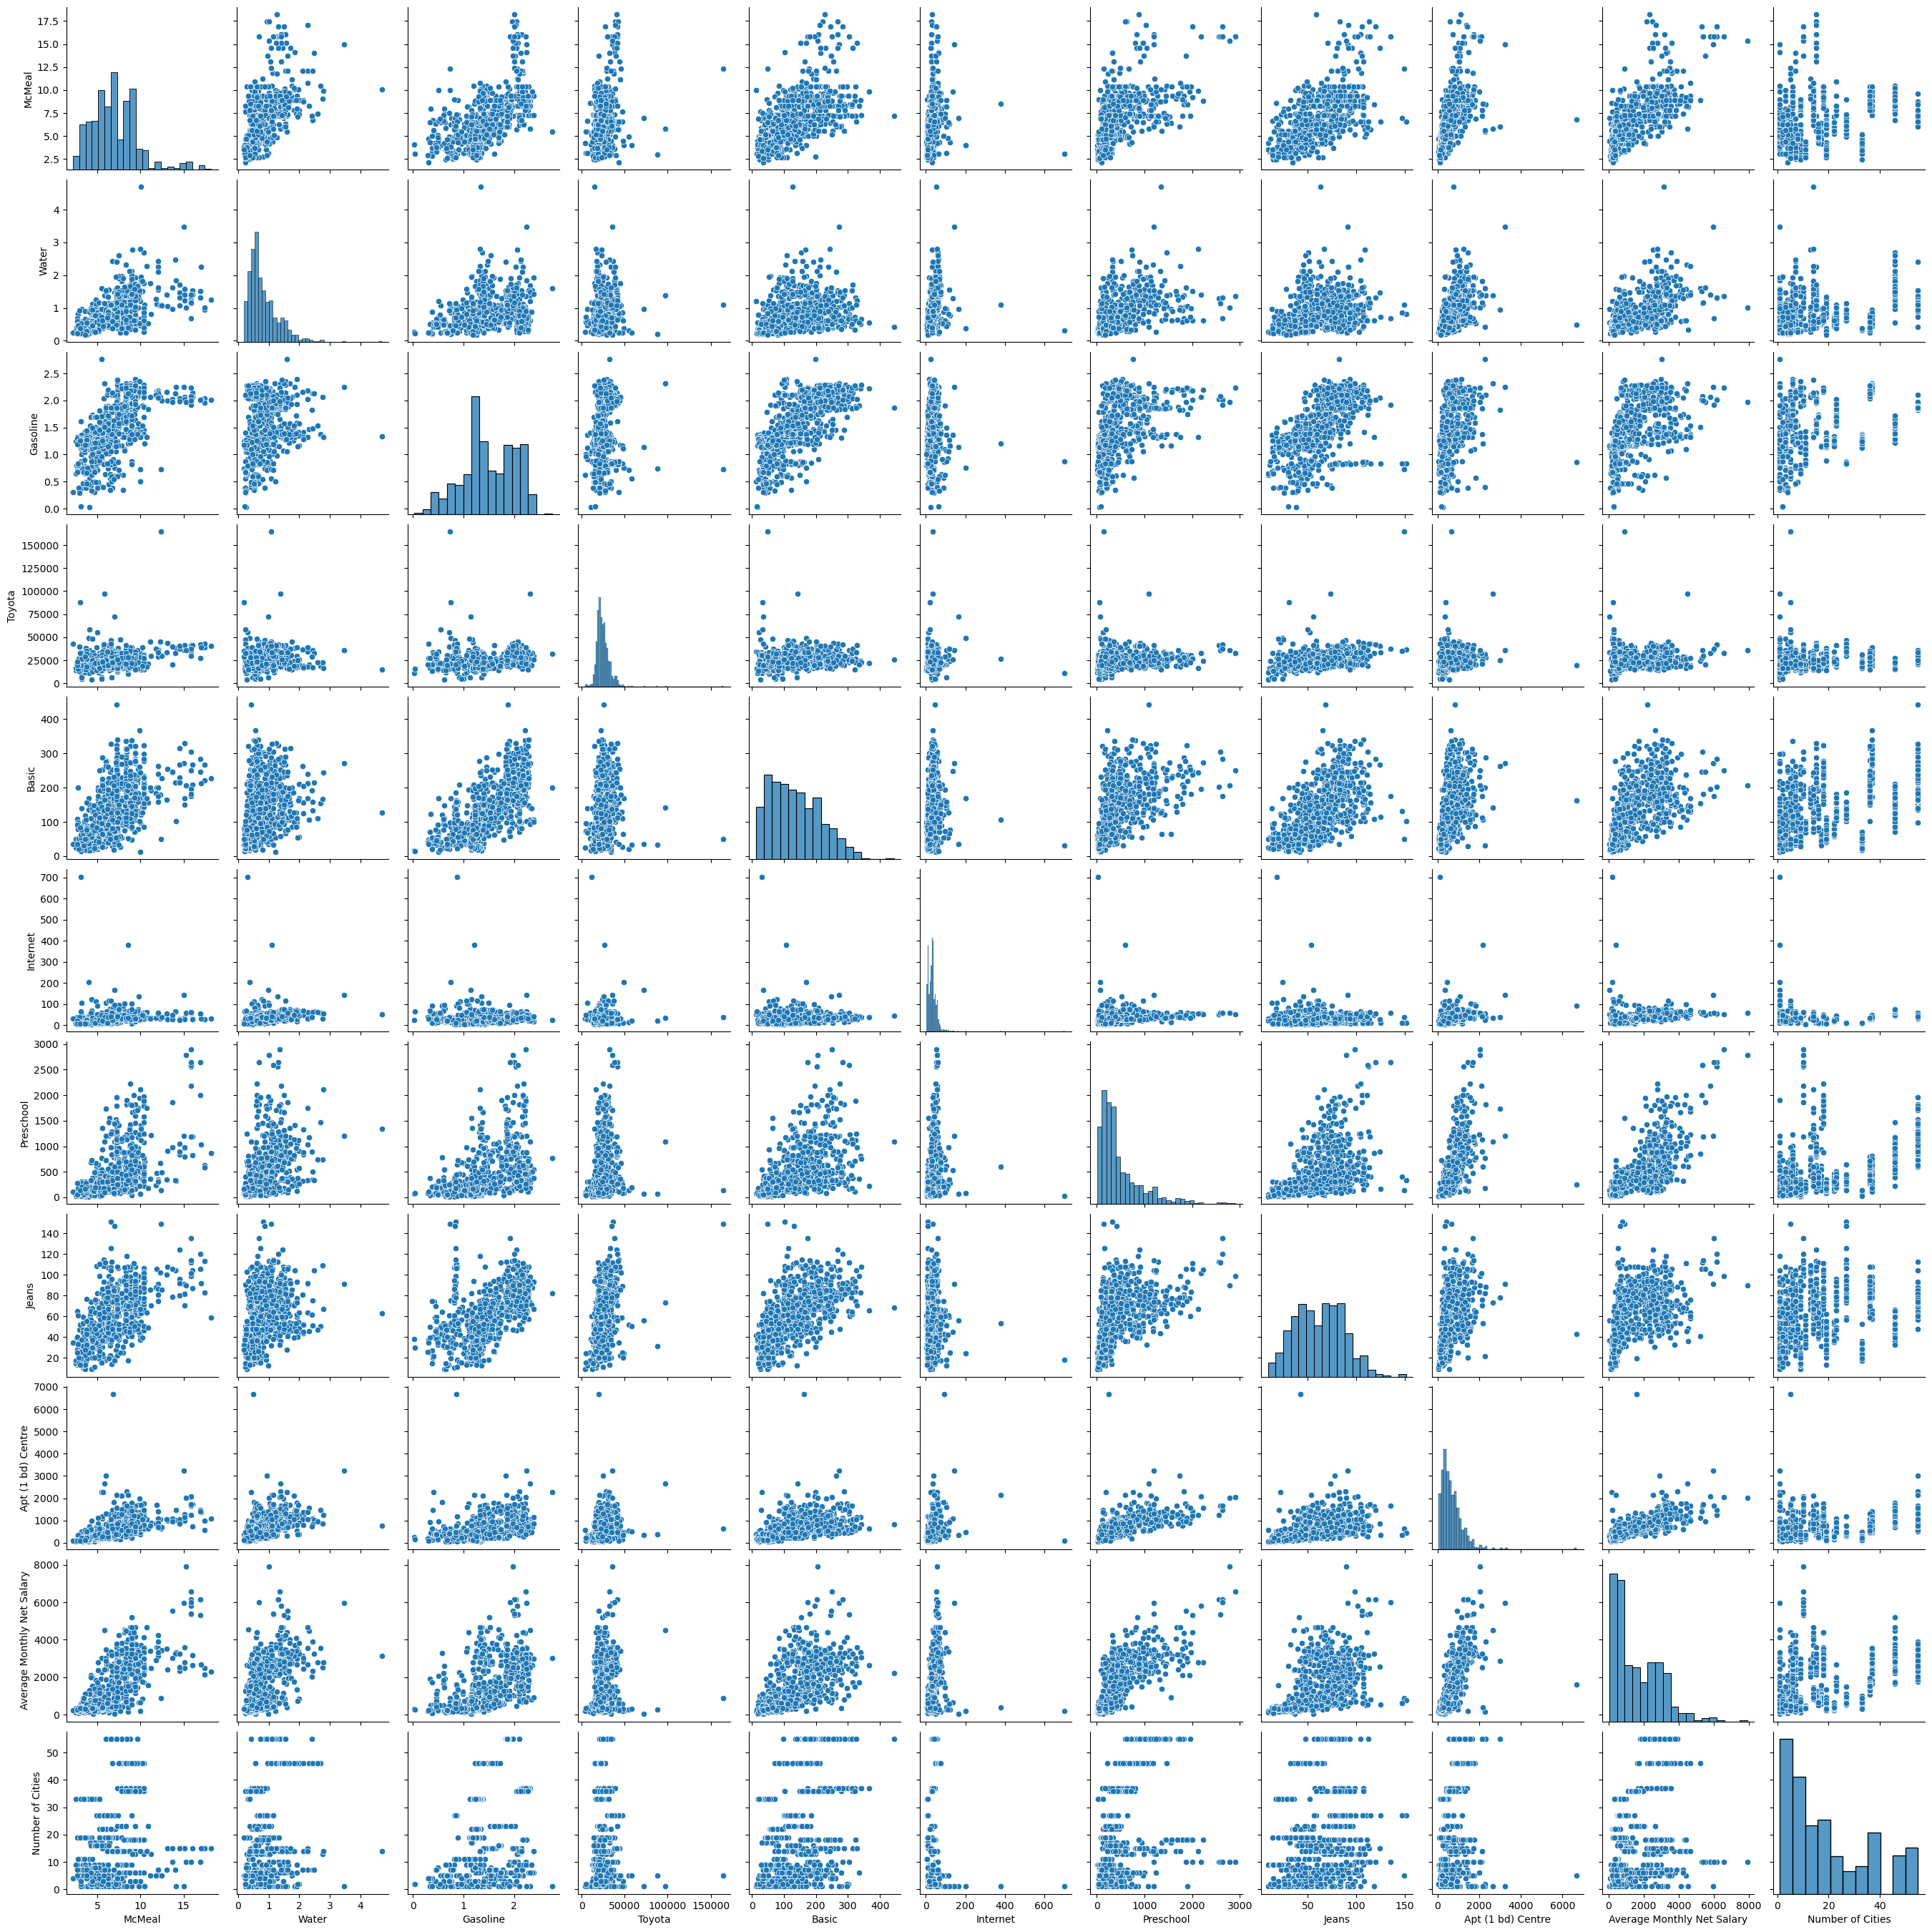

In [86]:
sns.pairplot(df)
plt.show()

Intepretation:
- On first glanse a most of the quatative vearibles have liner relationships with each other.
- It will be intersting to test if there is really a linear relationship between Gasoline and Salary.

## 2. What is the average cost of Gasoline and Toyta on different continents?

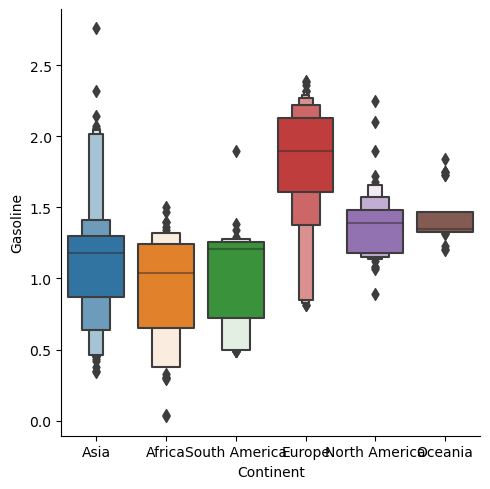

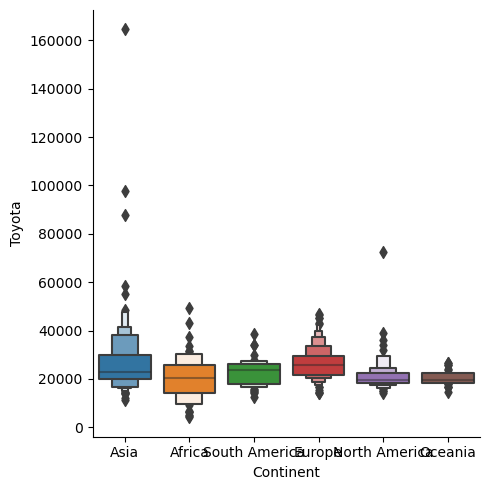

In [87]:
sns.catplot(
    data=df, 
    kind="boxen",
    x = "Continent", y = "Gasoline")
plt.show()

sns.catplot(
    data=df, 
    kind="boxen",
    x = "Continent", y = "Toyota")
plt.show()

Interpretation:
- The biggest average of Gasoline is in Europe.
- But the biggest ‘spreading’ of Gasoline is in Asia.
- Toyota has pretty simillar prices on all continents

## 3. What is the average cost of McMeal, Water and Gasoline on different continents?

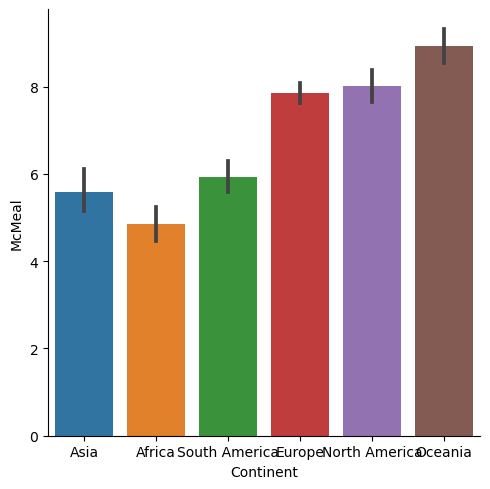

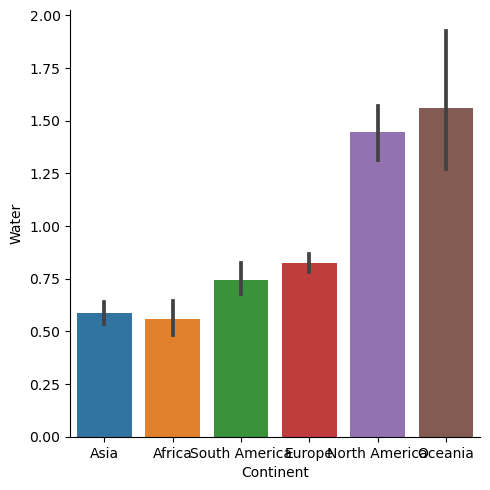

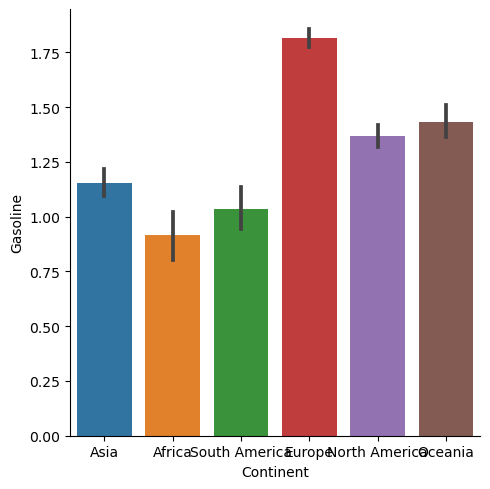

In [120]:
sns.catplot(
    data=df, 
    kind="bar", 
    x="Continent", y="McMeal")
plt.show()

sns.catplot(
    data=df, 
    kind="bar", 
    x="Continent", y="Water")
plt.show()

sns.catplot(
    data=df, 
    kind="bar", 
    x="Continent", y="Gasoline")
plt.show()

Interpretation:
- All three are the least expensive in Africa.
- McMeal and Water are the most expensive in Oceania, and Gaslonine is the most expensive in Europe.

## 4. What is the distribution of Basic, Preschool and Jeans costs on different continents?

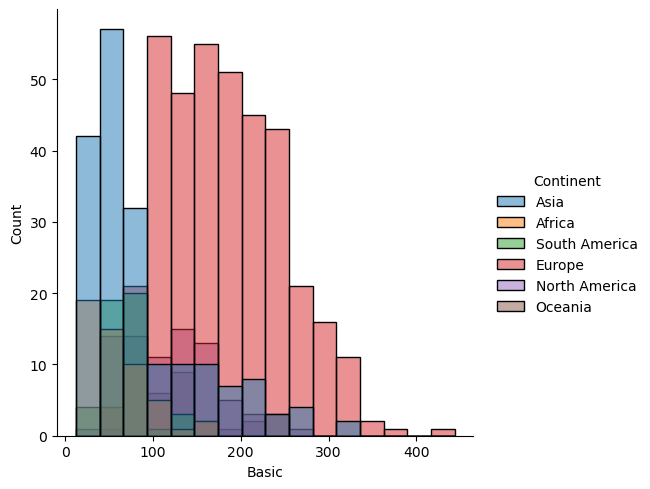

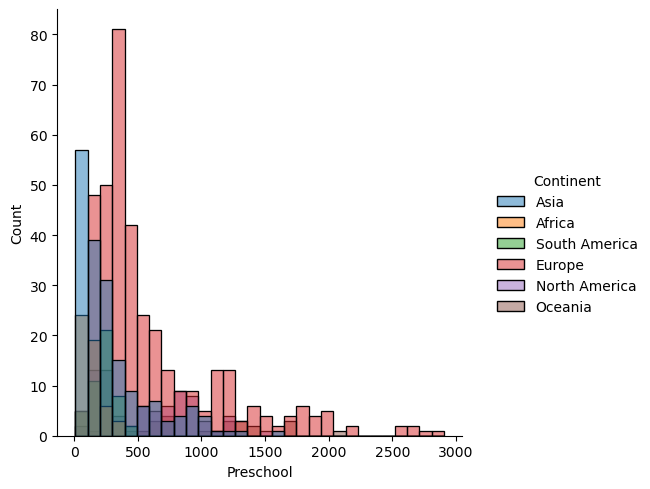

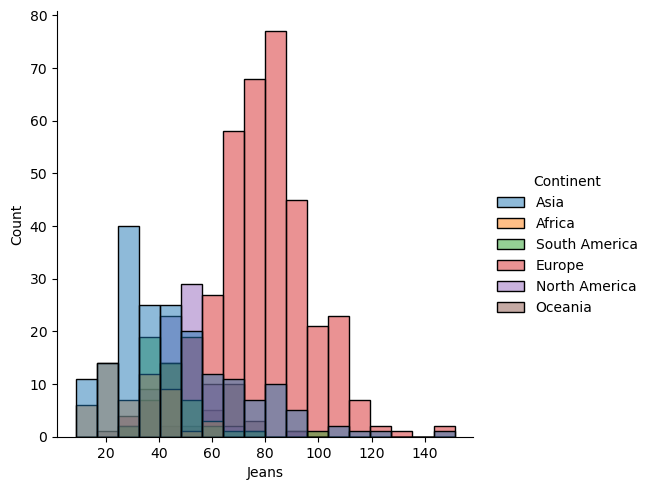

In [122]:
sns.displot(data=df, x="Basic", hue="Continent", kind = "hist")
plt.show()

sns.displot(data=df, x="Preschool", hue="Continent", kind = "hist")
plt.show()

sns.displot(data=df, x="Jeans", hue="Continent", kind = "hist")
plt.show()

Interpretation:
- Basics are the most expensive in Europe and North America (>100 USD). And the least expensive in Asia and Oceania (<100 USD).
- Preschool is the most expensive and most 'spread out' in Europe and North America. And the least expensive and least 'spread out' in Asia and Oceania.
- Jeans are the most expensive in Europe (>60 USD). And the least expensive in Asia (<60 USD).

## 5. What is the average Salary on different continents?

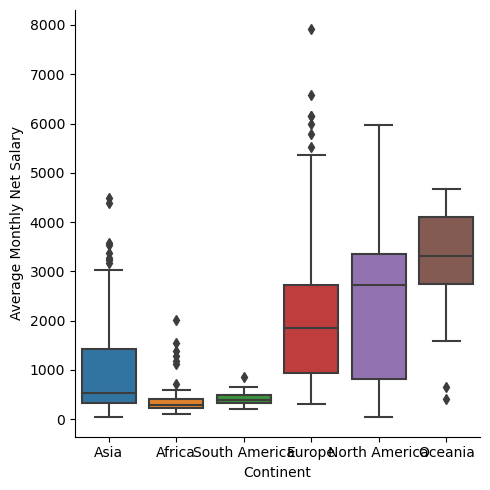

In [ ]:
sns.catplot(
    data=df, 
    kind="box",
    x = "Continent", y = "Average Monthly Net Salary")
plt.show()

Interpretation:\
- The biggest average of Salary is in Oceania.
- But the biggest ‘spreading’ of Salary is in Europe and North America.

# Tests

In [13]:
# import libraries and modules
from scipy import stats #for t-test and linear(simple) regression
from sklearn import model_selection #for split
from sklearn import linear_model #for linear(milti), ridge, lasso and logistic regressions
from sklearn import metrics #for confusion matrix

## T-test

Based on 5th question. I came up wih the following hypothesis.
- Null: There is no difference in Salary between North America and Europe.
- Alternative: There is a difference in Salary between North America and Europe. 

In order to test it I performed a t-test.

In [30]:
# t-test
df_1 = df[df["Continent"] == 'North America']
df_2 = df[df["Continent"] == 'Europe']

stats.ttest_ind(df_1["Average Monthly Net Salary"], df_2["Average Monthly Net Salary"])

Ttest_indResult(statistic=1.931744582068827, pvalue=0.05401855304174518)

The pvalue = 0.054 > 0.05 Therefore, we accept the the Null hypo: There is no  diffrence in the mean 'Average Monthly Net Salary' between North America and Oceania.

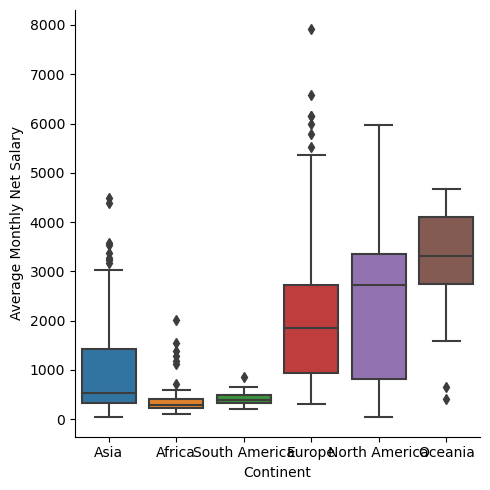

In [20]:
sns.catplot(
    data=df, 
    kind="box",
    x = "Continent", y = "Average Monthly Net Salary")
plt.show()

## Linear Regression (simple)

Based on 1st question. I came up wih the following hypothesis.
- Null: There is no linear relation between 'Gasoline' and "Average Monthly Net Salary".
- Alternative: There is a relationship  between 'Gasoline' and "Average Monthly Net Salary".

In order to test it I performed a linear regression.

In [32]:
# linear regression
stats.linregress(x = df["Gasoline"], y = df["Average Monthly Net Salary"])

LinregressResult(slope=1381.8560489093957, intercept=-478.945757284866, rvalue=0.5588670146001258, pvalue=7.178030904316267e-65, stderr=73.7486168902134, intercept_stderr=116.71372412754992)

The pvalue = 7.17 > 0.05 Therefore, we accept the Null hypo: There is no linear relation between 'Gasoline' and "Average Monthly Net Salary"

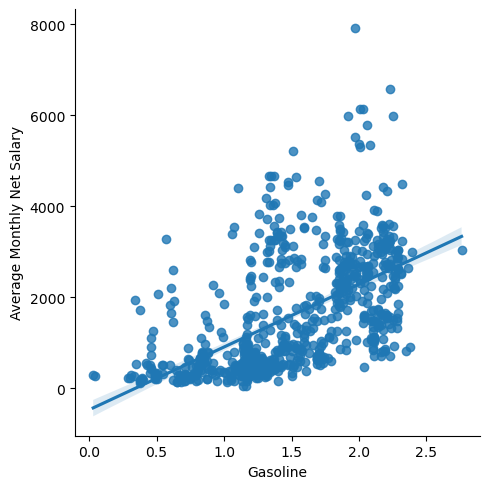

In [195]:
sns.lmplot(data = df, x="Basic", y = "Average Monthly Net Salary")
plt.show()

### Split

Before I performed Linear, Ridge and Lasso Regressions, I defined dependant varible (Average Monthly Salary) and independant varibels:

In [128]:
# independant variables
df.iloc[:,2:11].head()

,McMeal,Water,Gasoline,Toyota,Basic,Internet,Preschool,Jeans,Apt (1 bd) Centre
0,4.28,0.36,1.25,22972.31,57.37,7.96,73.76,32.05,223.87
1,5.59,0.62,1.17,20360.82,64.76,16.74,1356.63,69.17,1080.07
2,3.50,0.42,0.79,27978.73,80.12,30.45,132.74,38.87,482.85
3,3.54,0.65,1.38,18200.60,97.45,38.02,254.89,38.45,559.52
4,6.03,1.06,1.41,26851.06,176.24,22.06,384.01,56.99,809.83


And also I split the data into trian and test sets

In [134]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,2:11], df[["Average Monthly Net Salary"]], random_state=111)

## Linear Regression (multi)

In [135]:
# Fit a LinearRegression() model to predict the 'Average Monthly Net Salary' value from all other variables 
# based on the training data.
lin_reg = linear_model.LinearRegression().fit(X_train, y_train)

In [136]:
# "Score” of the prediction on the training and test set.
print("R^2 Score on train data: ", lin_reg.score(X_train, y_train))
print("R^2 Score on test data: ", lin_reg.score(X_test, y_test))

R^2 Score on train data:  0.7743935477953104
R^2 Score on test data:  0.7540718313412748


In [137]:
# Slope-Coeff
# Intercept-Coeff
print("Slope-Coeff: ", lin_reg.coef_)
print("Intercept-Coeff: ", lin_reg.intercept_)

Slope-Coeff:  [[ 1.18272538e+02  4.28155966e+02  2.45877957e+02 -7.35590429e-03
   8.56497064e-01  3.19839272e-01  1.04244496e+00  5.48882462e-01
   4.27273681e-01]]
Intercept-Coeff:  [-747.36157136]


In [138]:
# Coefficients corresponding to each variable 
pd.DataFrame({"variable" : X_train.columns, "coefficient" : lin_reg.coef_[0]}).sort_values("coefficient")

,variable,coefficient
3,Toyota,-0.007356
5,Internet,0.319839
8,Apt (1 bd) Centre,0.427274
7,Jeans,0.548882
4,Basic,0.856497
6,Preschool,1.042445
0,McMeal,118.272538
2,Gasoline,245.877957
1,Water,428.155966


## Ridge Regression

In [139]:
# Fit a Ridge() Regression model to predict the 'Average Monthly Net Salary' value from all other variables 
# based on the training data.
ridge_reg = linear_model.Ridge().fit(X_train, y_train)

In [140]:
# "Score” of the prediction on the training and test set.
print("R^2 Score on train data: ", ridge_reg.score(X_train, y_train))
print("R^2 Score on test data: ", ridge_reg.score(X_test, y_test))

R^2 Score on train data:  0.7743904483981631
R^2 Score on test data:  0.7544248191399316


In [141]:
# Slope-Coeff
# Intercept-Coeff
print("Slope-Coeff: ", ridge_reg.coef_)
print("Intercept-Coeff: ", ridge_reg.intercept_)

Slope-Coeff:  [[ 1.18786641e+02  4.22882327e+02  2.42196161e+02 -7.37873509e-03
   8.63464825e-01  3.23009652e-01  1.04291132e+00  5.63229566e-01
   4.28702730e-01]]
Intercept-Coeff:  [-743.76522097]


In [142]:
# Coefficients corresponding to each variable 
pd.DataFrame({"variable" : X_train.columns, "coefficient" : ridge_reg.coef_[0]}).sort_values("coefficient")

,variable,coefficient
3,Toyota,-0.007379
5,Internet,0.323010
8,Apt (1 bd) Centre,0.428703
7,Jeans,0.563230
4,Basic,0.863465
6,Preschool,1.042911
0,McMeal,118.786641
2,Gasoline,242.196161
1,Water,422.882327


## Lasso Regression

In [143]:
# Fit a Lasso() Regression model to predict the 'Average Monthly Net Salary' value from all other variables 
# based on the training data.
lasso_reg = linear_model.Lasso().fit(X_train, y_train)

In [144]:
# "Score” of the prediction on the training and test set.
print("R^2 Score on train data: ", lasso_reg.score(X_train, y_train))
print("R^2 Score on test data: ", lasso_reg.score(X_test, y_test))

R^2 Score on train data:  0.7743850135613375
R^2 Score on test data:  0.7546189869838225


In [145]:
# Slope-Coeff
# Intercept-Coeff
print("Slope-Coeff: ", ridge_reg.coef_)
print("Intercept-Coeff: ", ridge_reg.intercept_)

Slope-Coeff:  [[ 1.18786641e+02  4.22882327e+02  2.42196161e+02 -7.37873509e-03
   8.63464825e-01  3.23009652e-01  1.04291132e+00  5.63229566e-01
   4.28702730e-01]]
Intercept-Coeff:  [-743.76522097]


In [146]:
# Coefficients corresponding to each variable 
pd.DataFrame({"variable" : X_train.columns, "coefficient" : ridge_reg.coef_[0]}).sort_values("coefficient")

,variable,coefficient
3,Toyota,-0.007379
5,Internet,0.323010
8,Apt (1 bd) Centre,0.428703
7,Jeans,0.563230
4,Basic,0.863465
6,Preschool,1.042911
0,McMeal,118.786641
2,Gasoline,242.196161
1,Water,422.882327


**Which variable had the biggest effect on the prediction?** \
In all three models: Water, Gasoline and McMeal variables have the biggest coefficients. Therefore, they have the biggest influence on predicting 'Average Monthly Salary' variable.

**Which model would you suggest based on training and test accuracy?** \
.........................................Linear 	Ridge	Lasso\
R^2 Score on train data: 	0.7743	0.7743	0.7743\
R^2 Score on test data:  	0.7540	0.7544	0.7546

In all three models: R^2 scores seem to have similar values. So, we can say that all three models explain ~77% of the variance in the dependent variable(Average Monthly Salary) on both the training and test data. However, the test accuracy is slightly higher for the Ridge and Lasso models compared to the Linear model. Therefore, if the goal is to improve the generalization performance of the model and avoid overfitting, I would suggest using either the Ridge or Lasso model instead of the simple Linear model.

## Logistic Regression

### Split

Before I performed Logistic Regressions, I defined dependant varible (Density) and independant variabels:

In [11]:
# independant variables
df.iloc[:,2:12].head()

,McMeal,Water,Gasoline,Toyota,Basic,Internet,Preschool,Jeans,Apt (1 bd) Centre,Average Monthly Net Salary
0,4.28,0.36,1.25,22972.31,57.37,7.96,73.76,32.05,223.87,586.35
1,5.59,0.62,1.17,20360.82,64.76,16.74,1356.63,69.17,1080.07,1382.83
2,3.50,0.42,0.79,27978.73,80.12,30.45,132.74,38.87,482.85,483.19
3,3.54,0.65,1.38,18200.60,97.45,38.02,254.89,38.45,559.52,419.02
4,6.03,1.06,1.41,26851.06,176.24,22.06,384.01,56.99,809.83,2672.23


In [ ]:
And also I split the data into trian and test sets

SyntaxError: invalid syntax (2485001580.py, line 1)

In [15]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,2:12], df[["Density"]], random_state = 123)

In [16]:
# Fit a LogisitcRegression() model to predict the '' value from all other variables 
# based on the training data.
logistic_reg = linear_model.LogisticRegression().fit(X_train, y_train)

/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Confusion matrix on trian and test data
y_pred_test = logistic_reg.predict(X_test)
y_pred_train = logistic_reg.predict(X_train)
print("Confusion matrix on train data: ", metrics.confusion_matrix(y_train, y_pred_train))
print("Confusion matrix on test data ", metrics.confusion_matrix(y_test, y_pred_test))

Confusion matrix on train data:  [[ 65 140]
 [ 43 333]]
Confusion matrix on test data  [[ 15  59]
 [ 13 107]]


In [18]:
# "Score” of the prediction on the training and test set.
print("R^2 Score on train data: ", logistic_reg.score(X_train, y_train))
print("R^2 Score on test data: ", logistic_reg.score(X_test, y_test))

R^2 Score on train data:  0.685025817555938
R^2 Score on test data:  0.6288659793814433


In [19]:
# Coefficients corresponding to each variable 
pd.DataFrame({"variable" : X_test.columns, "coefficient" : logistic_reg.coef_[0]}).sort_values("coefficient")

,variable,coefficient
4,Basic,-0.005826
9,Average Monthly Net Salary,-0.000594
3,Toyota,0.000012
8,Apt (1 bd) Centre,0.000113
6,Preschool,0.000153
2,Gasoline,0.000210
1,Water,0.000384
0,McMeal,0.004447
7,Jeans,0.014858
5,Internet,0.029337


**Which variable had the biggest effect on the prediction?** \
In all three models: Internet has the biggest coefficient. Therefore, it has the biggest influence on predicting 'Density' variable.

**Would you recommend your model to be used for this prediction in the
future?** \
Confusion matrix on train data:  [[ 65 140] [ 43 333]] \
Confusion matrix on test data  [[ 15  59] [ 13 107]

R^2 Score on train data:  0.68 \
R^2 Score on test data:  0.62

First, looking at the confusion matrices,  confusion matrices, it seems that the model is performing better on the training data than on the test data. This could indicate that the model is overfitting the training data, and may not generalize well to new, unseen data.

Second, the R^2 scores on both the training and test data are moderate (62-68%), with a higher score on the training data than on the test data. This also suggests that the model may be overfitting.

Based on matrices and R^2 scores, logistic model seems overfitting. Therefore, if the goal is to improve the generalization performance of the model and avoid overfitting, I would not suggest using it and would suggest looking for better option for this specific prediction task.

## Summary

**5 questions to the dataset**

1. What is the relationship between quantative variables?

    Intepretation:
- On first glanse a most of the quatative vearibles have liner relationships with each other.
- It will be intersting to test if there is really a linear relationship between Gasoline and Salary.

2. What is the average cost of Gasoline and Toyta on different continents?

    Interpretation:
- The biggest average of Gasoline is in Europe.
- But the biggest ‘spreading’ of Gasoline is in Asia.
- Toyota has pretty simillar prices on all continents

3. What is the average cost of McMeal, Water and Gasoline on different continents?

    Interpretation:
- All three are the least expensive in Africa.
- McMeal and Water are the most expensive in Oceania, and Gaslonine is the most expensive in Europe.

4. What is the distribution of Basic, Preschool and Jeans costs on different continents?

    Interpretation:
- Basics are the most expensive in Europe and North America (>100 USD). And the least expensive in Asia and Oceania (<100 USD).
- Preschool is the most expensive and most 'spread out' in Europe and North America. And the least expensive and least 'spread out' in Asia and Oceania.
- Jeans are the most expensive in Europe (>60 USD). And the least expensive in Asia (<60 USD).

5. What is the average Salary on different continents?

    Interpretation:
- The biggest average of Salary is in Oceania.
- But the biggest ‘spreading’ of Salary is in Europe and North America.

**T-test**

Based on 5th question. I came up wih the following hypothesis.
- Null: There is no difference in Salary between North America and Europe.
- Alternative: There is a difference in Salary between North America and Europe.

In order to test it I performed a t-test.

The pvalue = 0.054 > 0.05 Therefore, we accept the the Null hypo: There is no  diffrence in the mean 'Average Monthly Net Salary' between North America and Oceania.


**Linear Regression**

Based on 1st question. I came up wih the following hypothesis.
- Null: There is no linear relation between 'Gasoline' and "Average Monthly Net Salary".
- Alternative: There is a relationship  between 'Gasoline' and "Average Monthly Net Salary".

In order to test it I performed a linera regression.

The pvalue = 7.17 > 0.05 Therefore, we accept the Null hypo: There is no linear relation between 'Gasoline' and "Average Monthly Net Salary"

**Linear (multi), Ridge, Lasso Regressions**

**Dependent Variable:**
- Average Monthly Salary

**Independent Variables:**
- McMeal (USD)
- Water (1.5 liter bottle) (USD)
- Gasoline (1 liter) (USD)
- Toyota Corolla Sedan (USD)
- Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
- Internet (USD)
- Preschool for 1 Child (USD)
- Jeans (USD)
- Apartment (1 bedroom) in City Centre (USD)

**Which variable had the biggest effect on the prediction?** \
In all three models: Water, Gasoline and McMeal variables have the biggest coefficients. Therefore, they have the biggest influence on predicting 'Average Monthly Salary' variable.

**Which model would you suggest based on training and test accuracy?** \
.........................................Linear 	Ridge	Lasso\
R^2 Score on train data: 	0.7743	0.7743	0.7743\
R^2 Score on test data:  	0.7540	0.7544	0.7546

In all three models: R^2 scores seem to have similar values. So, we can say that all three models explain ~77% of the variance in the dependent variable(Average Monthly Salary) on both the training and test data. However, the test accuracy is slightly higher for the Ridge and Lasso models compared to the Linear model. Therefore, if the goal is to improve the generalization performance of the model and avoid overfitting, I would suggest using either the Ridge or Lasso model instead of the simple Linear model.

**Logisitic Regression**

**Dependent Variable:**
- Density

**Independent Variables:**
- McMeal (USD)
- Water (1.5 liter bottle) (USD)
- Gasoline (1 liter) (USD)
- Toyota Corolla Sedan (USD)
- Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
- Internet (USD)
- Preschool for 1 Child (USD)
- Jeans (USD)
- Apartment (1 bedroom) in City Centre (USD)
- Average Monthly Net Salary (After Tax) (USD)

**Which variable had the biggest effect on the prediction?** \
In all three models: Internet has the biggest coefficient. Therefore, it has the biggest influence on predicting 'Density' variable.

**Would you recommend your model to be used for this prediction in the
future?** \
Confusion matrix on train data:  [[ 65 140] [ 43 333]] \
Confusion matrix on test data  [[ 15  59] [ 13 107]

R^2 Score on train data:  0.6850\
R^2 Score on test data:  0.6288

First, looking at the confusion matrices,  confusion matrices, it seems that the model is performing better on the training data than on the test data. This could indicate that the model is overfitting the training data, and may not generalize well to new, unseen data.

Second, the R^2 scores on both the training and test data are moderate (62-68%), with a higher score on the training data than on the test data. This also suggests that the model may be overfitting.

Based on matrices and R^2 scores, logistic model seems overfitting. Therefore, if the goal is to improve the generalization performance of the model and avoid overfitting, I would not suggest using it and would suggest looking for better option for this specific prediction task.